In [29]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
from scipy import integrate

In [46]:
def root_3(x):
    return x**(1/3)

In [47]:
def third_fun(x):
    return 4*x*((1-x)**3)

In [48]:
x_1 = np.linspace(0,8,100)
x_2 = np.linspace(0,np.pi,100)
x_3 = np.linspace(0,1,100)

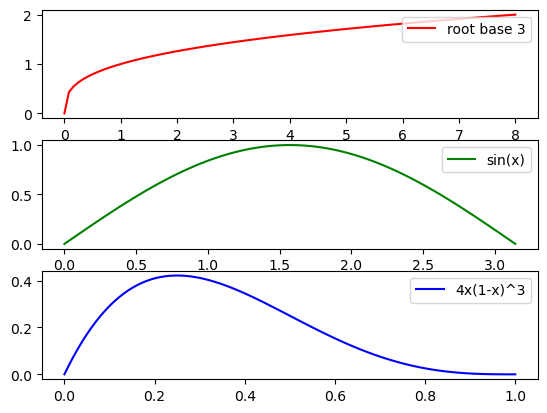

In [59]:
#plotting the relevant functions

fig, ax = plt.subplots(3,1)
ax[0].plot(x_1,root_3(x_1), label="root base 3", color="r")
ax[1].plot(x_2,np.sin(x_2), label = "sin(x)", color="g")
ax[2].plot(x_3,third_fun(x_3), label = "4x(1-x)^3", color="b")

ax[0].legend(loc='upper right')
ax[1].legend()
ax[2].legend()

In [60]:
rng = np.random.default_rng()

In [90]:
n=10
a=2
b=6
random_numbers_uniform = rng.random((n,2))

In [91]:
random_numbers_uniform[:,0] = a + random_numbers_uniform[:,0]*(b-a)

In [92]:
random_numbers_uniform

array([[4.19981784e+00, 2.31736644e-01],
       [2.95000832e+00, 1.14416603e-01],
       [5.85174258e+00, 2.01999217e-01],
       [2.90071234e+00, 4.10435276e-01],
       [4.48036840e+00, 6.05620704e-01],
       [5.82313923e+00, 8.08897931e-01],
       [3.73733567e+00, 5.64442712e-03],
       [2.09166784e+00, 7.74158649e-01],
       [4.26206330e+00, 9.03427818e-01],
       [3.80635952e+00, 1.52871367e-01]])

In [268]:
#n-number of features, func-function,x1-start of the integral range, x2-end of the integral range, M-supremum of the function
def monte_carlo_approximator(n,func,x2,M,x1=0, get_points=False):
    rng = np.random.default_rng()
    
    points = rng.random((n,2))
    points[:,0] = x1 + points[:,0]*(x2-x1)
    points[:,1] = points[:,1]*M
    y = func(points[:,0])
    
    C = np.sum(y>points[:,1])
    approx = C/n*(x2-x1)*M
    if get_points:
        return points,approx
    return approx

In [331]:
#k - number of simulations, the rest - monte_carlo_approximator
def get_average(k, n,func,x2,M,x1=0, get_points=False, get_attempts=False):
    sum=0
    attempts =[]
    for i in range(k):
        approx = monte_carlo_approximator(n,func,x2,M,x1,get_points)
        sum+=approx
        if get_attempts:
            attempts.append(approx)
    avg=sum/k
    attempts.append(avg)
    if get_attempts:
        return attempts,avg
    return avg

In [284]:
def f(x):
    return x**2

In [285]:
monte_carlo_approximator(n=10000,func=f,x2=2,M=5,x1=0)

2.646

In [286]:
get_average(50, n=10000,func=f,x2=2,M=5,x1=0)

2.66046

[1 2 3]
[[1 2]
 [2 2]
 [3 2]]
[2 2 2]


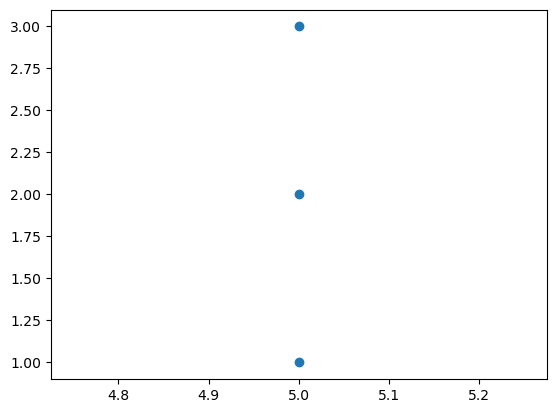

In [340]:
max_n = 5000
arr = np.array([[1,2],[2,2],[3,2]])
print(arr[:,0])
fig,ax = plt.subplots()
print(arr)
print(arr[:,1])

test_y = np.array([1,2,3])
test_x = np.full(test_y.shape,5)

ax.scatter(test_x, test_y)

In [341]:
test_arr = []
i=0
while i<max_n:
    attempts, _ = get_average(5,50,f,5,30,get_attempts=True)
    test_arr.append(attempts)
    i+=50

In [351]:
test_arr = np.array(test_arr).reshape(6,int(max_n/50))
test_arr.shape

(6, 100)